# Chapter 16: Transformations of Interval-Scaled Variables

##  <font color=blue> 16.1 Introduction </font>

In this chapter we will deal with transformations of interval variables. With interval variables we mean variables such as age, income, and number of children, which are measured on an interval or ratio scale. The most obvious transformation of interval variables is to perform a calculation such as addition or multiplication on them. However, we will also see in this chapter that the transformations are not restricted to simple calculations.

In this tutorial, the following topics are covered: 

- __Simple derived variables__, where we will look at simple calculations between interval variables and the creation of interactions.

- __Relative derived variables__, where we will consider the creation of ratios and proportions by comparing a value to another value.

- __Binning observations into groups__, where we will show that an interval value can be grouped with IF_THEN/ELSE clauses or formats.

- __Replacement of missing values__, where we will deal with replacing missing values with the mean of other variables.

- __Transformation of variables__, where we will show mathematical or statistical transformations of variables.

##  <font color=blue> 16.2 Simple Derived Variables </font>

The rationale for derived variables is that we create variables that hold information that is more suitable for analysis or for interpretation of the results. 

Derived variables are created by performing calculations on one or more variables and creating specific measures, sums, ratios, aggregations, or others.

Derived variables can be a simple calculation on one or more variables. For example, we can create the body mass index (BMI) with the following expression if WEIGHT is measured in kilograms and HEIGHT is measured in centimeters:


    BMI = Weight / Height **2;



 ### 16.2.1 Interactions and Quadratic Terms
 
 An interaction is a term in a model in which the effect of two or more factors is not simply additive. In the case of two binary input factors, the effect of the co-occurrence of both factors can be higher or lower than the sum of the sole occurrence of each factor. If the business rationale suggests that interactions exist between variables, the interactions will be included in the analysis.

Variables that contain an interaction between two variables can be easily built by a simple multiplication of the variables. The following code computes an interaction variable of AGE and WEIGHT:


    INT_AGE_WEIGHT = AGE * WEIGHT;

Note that by definition the interaction is missing if one of its components is missing, which is true for our expression. In some procedures, e.g., PROC REG, interactions cannot be created in the MODEL statement but need to be present in the input data.

A quadratic term and cubic term for AGE can be easily created by the following statement:


    AGE_Q = AGE ** 2;
    AGE_C = AGE ** 3;

Note that it is up to the programmer to name the AGE variable. AGE2 and AGE3 are also common to express the quadratic and cubic terms. When creating derived variables, the consecutive numbering of variables is very common. Although this "quick and dirty" approach is not the best programming style, we have to consider that the name AGE2 as the quadratic term can be easily confused with an age variable that is created with a different definition.

Resources: 

To know more about interaction terms, have a look at this example: 
https://www.theanalysisfactor.com/interpreting-interactions-in-regression/


### 16.2.3 Derived Variables: Sums and Means

In order to calculate simple descriptive measures over variables (columns) it is advisable to use the respective SAS functions such as MEAN, SUM, and others. For details, see SAS Help and Documentation. Instead of the following:


    SUM_USAGE = USAGE1 + USAGE2 + USAGE3;
    MEAN_USAGE = (USAGE1 + USAGE2 + USAGE3)/3;

the respective SAS function should be used:


    SUM_USAGE = SUM(USAGE1 USAGE2 USAGE3);
    MEAN_USAGE = MEAN(USAGE1 USAGE2 USAGE3);

The SAS functions also have the advantage that they handle missing values correctly. If, for example, USAGE2 is a missing value, the function will not return a missing value but sum the non-missing values. The MEAN function will correctly divide by the number of non-missing values.


### 16.2.4 Sums of Binary Variables or Expressions

An effective way to reduce the dimensionality in the input data is to create a counter variable that counts the occurrence of certain facts (responses, event…). For example, we have in a survey a set of variables on customer opinion about company A. Each question can be answered with YES/NO/MISSING, where YES is coded with 1, NO with 0, and MISSING with 9.

- Question1: Company A has a better product offer than the competition.
- Question2: Company A has more competitive pricing than the competition.
- Question3: Company A has a better standing in the market.
- Question4: Company A has more qualified employees.
- Question5: Company A supports non-profit and welfare organizations.

We build a variable by summing the YES answers for each subject. This variable will contain information about customer opinion and loyalty about the company.


    LOYALTY = sum((question1=1), (question2=1), (question3=1),
              (question4=1), (question5=1));
              
We sum the result of the Boolean expressions "QuestionX = 1". Again, we have an example of how an informative variable can be coded simply. This variable ranges from 0 to 5 and is a point score for loyalty. This can be generalized to all situations where we want to count events that fulfill a certain condition.




## <font color=blue> 16.3 Derived Relative Variables </font>

For some measurement variables it makes sense to set them relative to another measurement variable. The business rationale for derived relative variables is that the absolute number is not meaningful and we have to set the value relative to another value. 

For example, the relative cost of a hospital per patient day is used for comparison rather than the absolute cost. Basically we can distinguish between two types of derived relative variables, namely proportions and ratios.

- We talk about proportions if the numerator and the denominator have the same measurement unit. 
- In contrast, ratios are calculated by a fraction, where the numerator and denominator have different measurement units.

Proportions can be expressed in percent and are interpreted as "part of the whole." For example, 65% of the employees of company A have used tariff XY is a PROPORTION, whereas the average number of phone calls per day is a RATIO, as we divide, for example, the monthly number of phone calls by the number of days per month.

Frequently used denominators for derived relative variables include the following:

- number of employees
- number of days since the start of the customer relationship
- number of days since admission to the hospital or since the start of treatment 
- number of months in the observation period 
- number of contracts
- total amount of usage (minutes, number of calls, transactions, euro, dollars)


### 16.3.1 Creating Derived Relative Variables
Derived variables may be set relative to the values of other subjects. 

For an explanation consider a simple example. We will use the data from SASHELP.CLASS and only concentrate on the variable WEIGHT. The mean weight of the 19 pupils is 100.03 pounds. We want to use this mean to create derived relative variables that show whether a subject has a value above or below the mean. In the SAS program in the next section we will create these derived variables:

- __WEIGHT_SHIFT__

    The mean is subtracted from the values, which results in a shift of the distribution to a zero mean; the shape of the distribution is not changed.
     
         Weight_Shift = Weight-mean;


- __WEIGHT_RATIO__

    The values are divided by the mean. Assuming a positive mean, all positive values that are smaller than the mean are squeezed into the interval (0,1), whereas positive values larger than the mean are transferred to the interval (1,∞).
     
         Weight_Ratio = Weight/mean;


- __WEIGHT_CENTRATIO__

    The centered ratio combines the calculations from WEIGHT_SHIFT and WEIGHT_RATIO by shifting the distribution to a zero mean and dividing the values by the mean.
     
         Weight_CentRatio = (Weight-mean)/mean;

- __WEIGHT_STD__

    Subtracting the mean and dividing the values by the standard deviation leads to the standardized values. This is very much used in clusterting techniques (grouping observations into clusters) where distance measures between observations are used. 
         
         WEIGHT_STD = (Weight-mean)/sd;
     Use proc standard http://support.sas.com/documentation/cdl/en/proc/61895/HTML/default/viewer.htm#standard-overview.htm

- __WEIGHT_RNK__

    Ranking the values by their size gives the ordinal-scaled variable WEIGHT_RNK. Ties have been set to the lower rank.
    
    use proc Rank: http://support.sas.com/documentation/cdl/en/proc/61895/HTML/default/viewer.htm#a002473611.htm


In [6]:
proc print data=sashelp.class; 
run; 

Obs,Name,Sex,Age,Height,Weight
1,Alfred,M,14,69.0,112.5
2,Alice,F,13,56.5,84.0
3,Barbara,F,13,65.3,98.0
4,Carol,F,14,62.8,102.5
5,Henry,M,14,63.5,102.5
6,James,M,12,57.3,83.0
7,Jane,F,12,59.8,84.5
8,Janet,F,15,62.5,112.5
9,Jeffrey,M,13,62.5,84.0
10,John,M,12,59.0,99.5


### 16.3.3 Coding Relative Variables Based on Population Means

In [7]:
DATA class;
 FORMAT ID 8.;
 SET sashelp.class(KEEP = weight);
 ID = _N_;
 Weight_Shift = Weight-100.03;
 Weight_Ratio = Weight/100.03;
 Weight_CentRatio = (Weight-100.03)/100.03;
RUN;

proc print data=class; 
run;

Obs,ID,Weight,Weight_Shift,Weight_Ratio,Weight_CentRatio
1,1,112.5,12.47,1.12466,0.12466
2,2,84.0,-16.03,0.83975,-0.16025
3,3,98.0,-2.03,0.97971,-0.02029
4,4,102.5,2.47,1.02469,0.02469
5,5,102.5,2.47,1.02469,0.02469
6,6,83.0,-17.03,0.82975,-0.17025
7,7,84.5,-15.53,0.84475,-0.15525
8,8,112.5,12.47,1.12466,0.12466
9,9,84.0,-16.03,0.83975,-0.16025
10,10,99.5,-0.53,0.99470,-0.00530


In [8]:
proc standard data=class (keep= id weight) out=class2 mean=0 std=1; 
    var weight; 
run;



data class2(RENAME= (weight=weight_Std)); 
set class2;
run; 

proc print data=class2; 
run; 

Obs,ID,weight_Std
1,1,0.54772
2,2,-0.70371
3,3,-0.08898
4,4,0.10862
5,5,0.10862
6,6,-0.74762
7,7,-0.68176
8,8,0.54772
9,9,-0.70371
10,10,-0.02311


In [9]:
Data class; 
    MERGE class class2;
    By id; 
Run; 

proc print data=class;
run;


Obs,ID,Weight,Weight_Shift,Weight_Ratio,Weight_CentRatio,weight_Std
1,1,112.5,12.47,1.12466,0.12466,0.54772
2,2,84.0,-16.03,0.83975,-0.16025,-0.70371
3,3,98.0,-2.03,0.97971,-0.02029,-0.08898
4,4,102.5,2.47,1.02469,0.02469,0.10862
5,5,102.5,2.47,1.02469,0.02469,0.10862
6,6,83.0,-17.03,0.82975,-0.17025,-0.74762
7,7,84.5,-15.53,0.84475,-0.15525,-0.68176
8,8,112.5,12.47,1.12466,0.12466,0.54772
9,9,84.0,-16.03,0.83975,-0.16025,-0.70371
10,10,99.5,-0.53,0.99470,-0.00530,-0.02311


In [10]:
proc rank data=class out=class Ties=low descending; 
    var weight; 
    ranks weight_Rnk; 
run; 

proc sort data=class; 
by weight_Rnk; 
run; 


proc print data=class; 
run;

Obs,ID,Weight,Weight_Shift,Weight_Ratio,Weight_CentRatio,weight_Std,weight_Rnk
1,15,150.0,49.97,1.49955,0.49955,2.19434,1
2,17,133.0,32.97,1.32960,0.32960,1.44787,2
3,16,128.0,27.97,1.27962,0.27962,1.22832,3
4,1,112.5,12.47,1.12466,0.12466,0.54772,4
5,8,112.5,12.47,1.12466,0.12466,0.54772,4
6,14,112.0,11.97,1.11966,0.11966,0.52576,6
7,19,112.0,11.97,1.11966,0.11966,0.52576,6
8,4,102.5,2.47,1.02469,0.02469,0.10862,8
9,5,102.5,2.47,1.02469,0.02469,0.10862,8
10,10,99.5,-0.53,0.99470,-0.00530,-0.02311,10


Comments: 
- In the preceding code we artificially created an ID variable from the logical _N_ variable in order to have a subject identifier in place.

- We needed this subject identifier to merge the results of PROC STANDARD with the original data because PROC STANDARD does not create a new variable but overwrites the existing variables.


#### <font color=magenta> Q1. Activity  </font> 
The following code uses proc sgplot on the "class" dataset and show the histogram of the variable Weight. 
- Reuse the code to create a histogram of the variables Weight_Shift, Weight_Ratio, Weight_CentRatio and weight_Std
- Weight_Std is a transformaiton of the data distribution by representing data points with the z-score. What is the range of values of the z-scores? What does the values 1 and 2 refer to?  


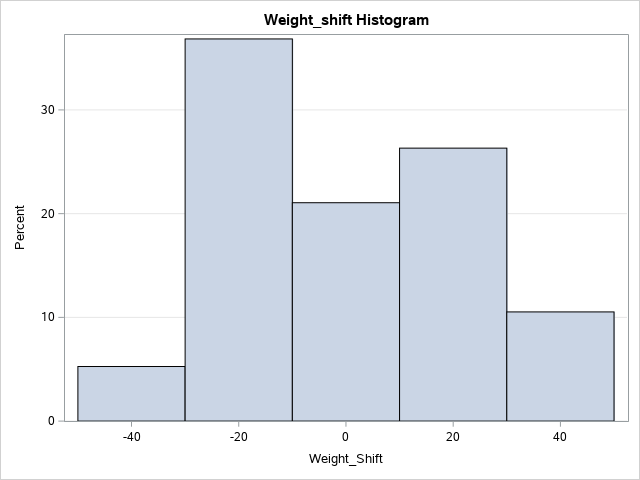
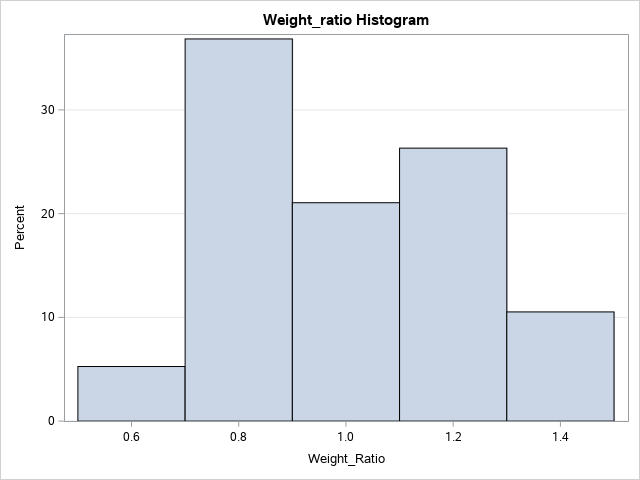
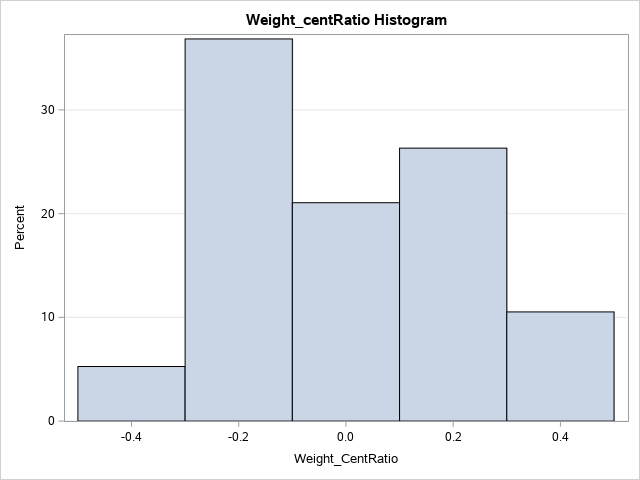
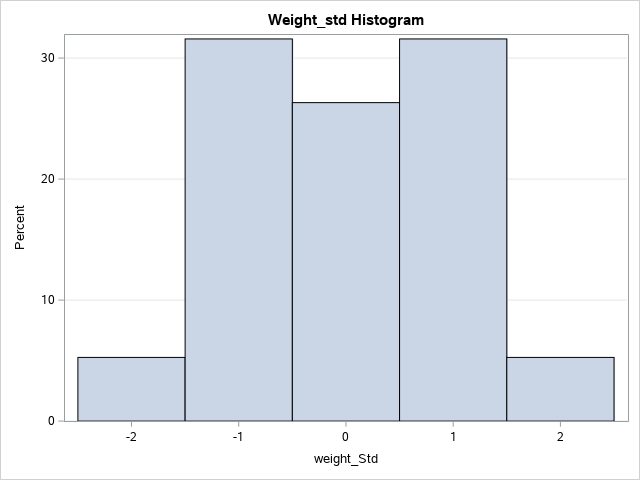

In [17]:
title "Weight_shift Histogram";
proc sgplot data=class;
  histogram weight_shift;
  keylegend / location=inside position=topright across=1;
  yaxis offsetmin=0 grid;
run;
title "Weight_ratio Histogram";
proc sgplot data=class;
  histogram weight_ratio;
  keylegend / location=inside position=topright across=1;
  yaxis offsetmin=0 grid;
run;

title "Weight_centRatio Histogram";
proc sgplot data=class;
  histogram weight_CentRatio;
  keylegend / location=inside position=topright across=1;
  yaxis offsetmin=0 grid;
run;

title "Weight_std Histogram";
proc sgplot data=class;
  histogram weight_std;
  keylegend / location=inside position=topright across=1;
  yaxis offsetmin=0 grid;
run;


In [20]:
proc univariate data = class (keep=weight_Std);run;

the z-score range: -2.17 to 2.19

the value of z-score of 1 refer to the data point is 1 sd from the mean

## <font color=blue> 16.5 Binning Observations into Groups </font> 
In some cases it is necessary to bin interval-scaled values into groups. For example, in the case of a variable with hundreds of different values, the calculation of frequencies for each value does not make sense. In these cases the observations are binned into groups and the frequencies are calculated for the groups. Note that the terms grouping and binning are used interchangeably in this chapter.

Basically there are three main methods to group observations:
- creating groups of equal number of observations with PROC RANK

- creating groups of equal widths with SAS functions

- creating individual groups with IF-THEN/ELSE statements or SAS formats




 ### 16.5.1 Creating Groups of Equal Number of Observations with PROC RANK
 
PROC RANK is used to group observations in groups of (almost) equal size. Note that in the case of ties (equal values), equal group sizes are not always possible.
 
To bin the observations of the SASHELP.AIR data set into 10 groups we can use PROC RANK as follows:

    PROC RANK DATA = sashelp.air OUT = air
              GROUPS = 10;
     VAR air;
     RANKS air_grp;
    RUN;

Note the following:

- The specification of a separate output data set with the OUT= option is in some cases desirable but not necessary.
- One or more variables can be ranked within one PROC RANK invocation.
- The ordering of the ranks (group numbers) can be reversed using the DESCENDING option in the PROC RANK statement.
- The ranks start with 0. If ranks starting from 1 are needed, they have to be incremented in a DATA step.


In [12]:
proc print data=sashelp.air; 
run; 


Obs,DATE,AIR
1,JAN49,112
2,FEB49,118
3,MAR49,132
4,APR49,129
5,MAY49,121
6,JUN49,135
7,JUL49,148
8,AUG49,148
9,SEP49,136
10,OCT49,119


In [32]:
proc rank data=sashelp.air out=air groups=10; 
var air; 
ranks air_grp; 
run; 

proc sort data=air; 
by air_grp; 
run;

proc print data=air; 
run;


Obs,DATE,AIR,air_grp
1,JAN49,112,0
2,FEB49,118,0
3,MAR49,132,0
4,APR49,129,0
5,MAY49,121,0
6,OCT49,119,0
7,NOV49,104,0
8,DEC49,118,0
9,JAN50,115,0
10,FEB50,126,0


#### <font color=Magenta>  Q2. Activity </font>
- Use proc rank with the group option to create 4 groups of the sashelp.class dataset, use the variable weight to rank based on. 
- Within a data step, increment the airgrp to have them starting from 1. print the output.

In [29]:
proc rank data=sashelp.class out=class groups=4; 
var weight; 
ranks weight_grp; 
run; 

proc sort data=class; 
by weight_grp; 
run;
title 'Class data set with weight group';
proc print data=class; 
run;

Obs,Name,Sex,Age,Height,Weight,weight_grp
1,Alice,F,13,56.5,84.0,0
2,James,M,12,57.3,83.0,0
3,Jeffrey,M,13,62.5,84.0,0
4,Joyce,F,11,51.3,50.5,0
5,Louise,F,12,56.3,77.0,0
6,Barbara,F,13,65.3,98.0,1
7,Jane,F,12,59.8,84.5,1
8,Judy,F,14,64.3,90.0,1
9,Thomas,M,11,57.5,85.0,1
10,Carol,F,14,62.8,102.5,2


In [33]:
data air;
    set air;
    air_grp2 = air_grp + 1;
run;

data air (rename=(air_grp2=air_grp)) ;
    set air (drop  = air_grp) ;
run;

title 'Air data with new air_grp starting from 1';
proc print data = air;
run;

Obs,DATE,AIR,air_grp
1,JAN49,112,1
2,FEB49,118,1
3,MAR49,132,1
4,APR49,129,1
5,MAY49,121,1
6,OCT49,119,1
7,NOV49,104,1
8,DEC49,118,1
9,JAN50,115,1
10,FEB50,126,1


### 16.5.2: Creating Groups of Equal Widths with SAS Functions

Groups of equal widths can be easily created with the SAS functions CEIL or FLOOR. The FLOOR function rounds down. The CEIL function rounds up.

See the following example code and the corresponding output for the SASHELP.AIR data set

Note the following:

- With the variable AIR_GRP1 we have created a group variable that bins observations greater than 100 up to 110 into group 11, observations greater than 110 up to 120 into group 12, and so on.

- AIR_GRP2, AIR_GRP3, and AIR_GRP4 have the same grouping rule but assign different values to the groups. AIR_GRP2 assigns the maximum value in each group as a group label.

- It is easy to change the code to receive group midpoints just by subtracting 5, as we see in AIR_GRP3.

- AIR_GRP4 gives a consecutive group numbering, which we receive by subtracting the (minimum group number -10).



In [34]:
DATA air;
 SET sashelp.air;
  Air_grp1 = CEIL(air/10);
  Air_grp2=  CEIL(air/10)*10; 
  Air_grp3= CEIL(air/10)*10 -5; 
  Air_grp4= CEIL(air/10)-10;
RUN;


proc sort data=air; 
    by Air_grp1; 
run; 

proc print data=air; 
run;

Obs,DATE,AIR,Air_grp1,Air_grp2,Air_grp3,Air_grp4
1,NOV49,104,11,110,105,1
2,JAN49,112,12,120,115,2
3,FEB49,118,12,120,115,2
4,OCT49,119,12,120,115,2
5,DEC49,118,12,120,115,2
6,JAN50,115,12,120,115,2
7,NOV50,114,12,120,115,2
8,APR49,129,13,130,125,3
9,MAY49,121,13,130,125,3
10,FEB50,126,13,130,125,3


#### <font color=Magenta> Q3. Activity </font>
Change the previous code and consider only Air_grp1 to create bins of width=100. print the output

In [35]:
DATA air;
 SET sashelp.air;
  Air_grp1 = CEIL(air/10)*100;
RUN;


proc sort data=air; 
    by Air_grp1; 
run; 

proc print data=air; 
run;

Obs,DATE,AIR,Air_grp1
1,NOV49,104,1100
2,JAN49,112,1200
3,FEB49,118,1200
4,OCT49,119,1200
5,DEC49,118,1200
6,JAN50,115,1200
7,NOV50,114,1200
8,APR49,129,1300
9,MAY49,121,1300
10,FEB50,126,1300


### 16.5.3: Creating Individual Groups 

The advantage of the preceding two grouping methods is that they can be performed with only a few SAS statements. It is, however, not possible to use them to specify individual group boundaries. For this task, IF-THEN/ELSE statements or PROC FORMAT can be used.

Using IF-THEN/ELSE Statements

See the following code for an example:


In [36]:
data air; 
     set sashelp.air; 
     format air_grp $15.; 
     
     if  air= . then air_grp= '00: Missing'; 
     else if air <220 then air_grp = '01: <220'; 
     else if air <275 then air_grp= '02: 220-274'; 
     else                  air_grp= '03: >=275' ;     
run; 

proc print data=air; 
run; 



Obs,DATE,AIR,air_grp
1,JAN49,112,01: <220
2,FEB49,118,01: <220
3,MAR49,132,01: <220
4,APR49,129,01: <220
5,MAY49,121,01: <220
6,JUN49,135,01: <220
7,JUL49,148,01: <220
8,AUG49,148,01: <220
9,SEP49,136,01: <220
10,OCT49,119,01: <220


Note the following:

- Formatting the variable that holds the new group names is advisable. Otherwise, the length of the variable is determined from the first assignment, which can cause truncation of the group names.
- The group names contain a numbering according to their size. This is advisable for a sorted output.
- The vertically aligned coding has the advantage that it is easier to read and to edit.


__Using SAS Formats__

The preceding grouping can also be created by defining a SAS format and assigning the format to the variable AIR during analysis:

    PROC FORMAT;
     VALUE air
       .  = '00: MISSING'
       LOW -< 220 = '01: < 220'
       220 -< 275 = '02: 220 - 274'
       275 - HIGH = '03: > 275';
    RUN;

Create a new variable in a DATA step by using the format in a PUT function:

    DATA air;
     SET sashelp.air;
     Air_grp = PUT(air,air.);
    RUN;

# <font color=magenta> Q4. Activity </font> 
- adjust the proc format procedure in the previous code to create 5 bins instead of 4 with keeping the first bin 00:MISSING, <100, between 100 and 200, between 200 and 300, and above 300.
- create a new varianle air_grp in a DATA step and assign values using the put function by applying the format, and print the data.
 

In [38]:
PROC FORMAT;
 VALUE air
   .  = '00: MISSING'
   LOW -< 100 = '01: < 100'
   100 -< 200 = '02: 100 - 200'
   200 -< 300 = '03: 200 - 300'
   300 - HIGH = '04: > 300';
RUN;


DATA air;
 SET sashelp.air;
 Air_grp = PUT(air,air.);
RUN;

title "Air dataset with 5 bins";
proc print data = air;
run;

Obs,DATE,AIR,Air_grp
1,JAN49,112,02: 100 - 200
2,FEB49,118,02: 100 - 200
3,MAR49,132,02: 100 - 200
4,APR49,129,02: 100 - 200
5,MAY49,121,02: 100 - 200
6,JUN49,135,02: 100 - 200
7,JUL49,148,02: 100 - 200
8,AUG49,148,02: 100 - 200
9,SEP49,136,02: 100 - 200
10,OCT49,119,02: 100 - 200
